In [4]:
import csv
import scrapy
import re
from collections import Counter

In [6]:

with open('du_lieu.csv', newline='', encoding='utf-8') as csvfile:
    # Tạo một đối tượng đọc CSV
    csvreader = csv.reader(csvfile)
    st=""
    # Đọc từng dòng trong file CSV và in ra
    for row in csvreader:
        content = row[1]
        # Tách các từ từ nội dung sử dụng biểu thức chính quy
        words = re.findall(r'\b\w+\b', content)
        s=""
        # Duyệt qua từng từ được trong danh sách các từ
        for word in words:
            if(word=="dc"):
                word="được"
            elif (word=="ko" or word=="k"):
                word="không"
            elif (word=="r"):
                word="rồi" 
            elif (word=="b" or word=="bn"):
                word="bạn"    
            #print(word)
            s+=word+" "
        st+=s+" "    
    words = st .split()
    word_counts = Counter(words)
    #print(word_counts)
    for word, count in word_counts.items():
        if count > 50:
            print(word, count)
      

năm 57
rồi 60
mình 109
đi 279
là 146
cũng 77
còn 76
Nguyễn 51
nước 94
có 141
không 174
bạn 85
chứ 61
lịch 53
thì 147
vé 156
giá 75
mà 130
bay 117
máy 54
Xem 71
thêm 78
hơn 94
rẻ 69
ở 53


In [43]:
with open('du_lieu.csv', newline='', encoding='utf-8') as csvfile:
    data_reader = csv.reader(csvfile)
    data = []
    for row in data_reader:
        data.append(row)
for item in data:
    if len(item) < 3:
        item.append(0)
    else:
        try:
            item[2] = int(item[2])
        except ValueError:
            item[2] = 0 

sorted_data = sorted(data, key=lambda x: x[2], reverse=True)

for item in sorted_data:
    print(item)


['Nghèo nó hay xui', 'Có mấy bận search cái vé SG - HN bằng hẳn cái vé SG - Seoul :)))))))) thiệt chứ chán ko muốn nói nữa lun', 742]
['Tung Ngo Quang', 'Nước nghèo nhưng giá vé mb thì lại đắt. Đcm.', 431]
['Đinh Nhật Dạ', 'Khứ hồi ra HN tận 4 củ trong khi đó t đi Malay cũng khứ hồi còn chưa tới 2 củ nữa', 430]
['Phạm Phương Anh', 'Neil Do mục đích gì thì vẫn là di chuyển thôi chứ đâu ra cái lí vì không phải du lịch nên vé đắt vậy :))', 399]
['Dương Hoàng Anh', 'thật, giờ mà bảo du lịch chỉ nghĩ đến Thái, Sing hoặc Malay chứ chả dám đi trong nước', 363]
['Ng Thach Truong', 'Giá vé máy bay đơn giản là do câu chuyện cung và cầu. Kinh tế tăng trưởng nhanh khiến nhu cầu đi lại tăng nhanh, tốc độ tăng nhanh hơn sự phát triển của ngành giao thông vận tải. Ở những nước phát triển hơn như Đài hay Nhật những chặng vài trăm km thì … Xem thêm', 298]
['Ai Biết Không', 'Nghèo nó hay xui thật sự nha mình đang ở Brisbane muốn về Hà Nội mà giá Brisbane về HCM có 6 triệu 8 xong search vé từ HCM về Hà N

Người bình luận nhiều nhất là Quoc Huy Tran với 16 bình luận


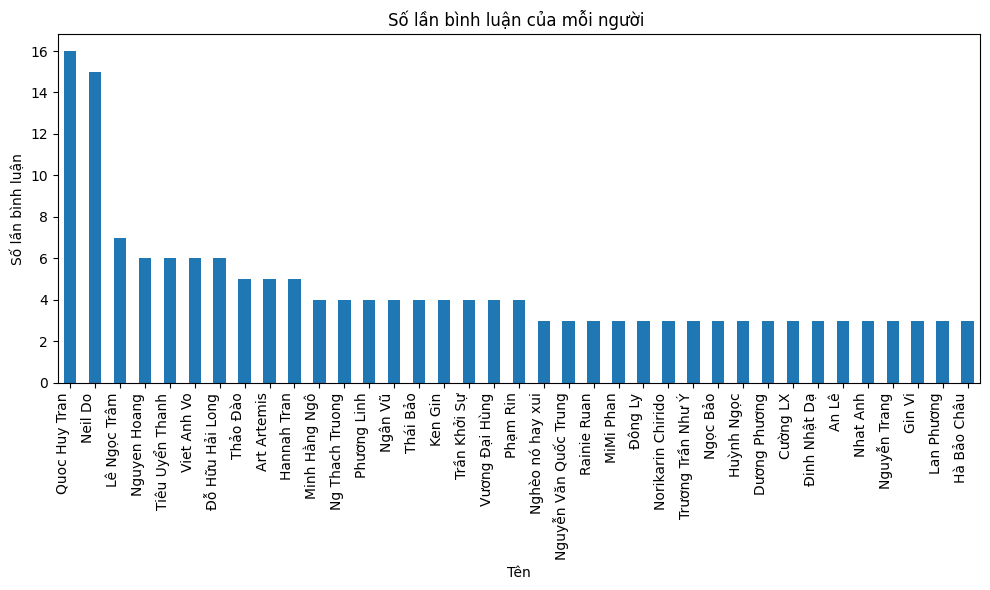

In [8]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('du_lieu.csv', names=['Tên', 'Bình luận', 'Số lần bình luận'])
comment_counts = data['Tên'].value_counts()
comment_counts = comment_counts[comment_counts > 2]

most_commented_name = comment_counts.idxmax()
most_commented_count = comment_counts.max()

print("Người bình luận nhiều nhất là {} với {} bình luận".format(most_commented_name, most_commented_count))

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
comment_counts.plot(kind='bar')
plt.title('Số lần bình luận của mỗi người ')
plt.xlabel('Tên')
plt.ylabel('Số lần bình luận')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


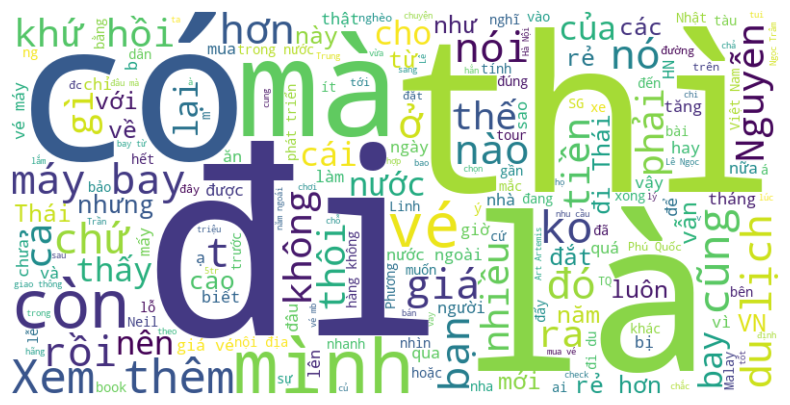

In [10]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = pd.read_csv('du_lieu.csv', names=['Tên', 'Bình luận', 'Số lần bình luận'])

text = ' '.join(data['Bình luận'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Vẽ WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
